### A graph with two phase: an initial spike converging to a limit, and then gradually converging to another limit

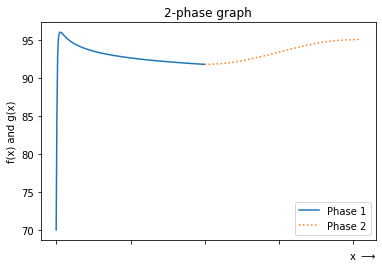

In [2]:
from math import pi, sin
import numpy as np
import matplotlib.pyplot as plt

# The function f is a function where f(0) = 70 and lim f = 80, and max(f) < 100
# f does not converge very quickly to 80 due to the 20 * x**1.9 term
f = lambda x: (80*x**2+20*x**1.9+70)/(x**2+1)
x_part1 = np.linspace(0, 200, 200)
y_part1 = np.array([f(x) for x in x_part1])

y_1 = y_part1[-1]
offset = len(x_part1)
length = 200
y_scale = (95-y_1)/2
# The function g is half of the sine function, scaled and offset to produce a line from y_1 to 95
# Basically, [-1, 1] -> [y_1, 95]
g = lambda x: y_scale*sin(x) + y_1 + y_scale
x_part2 = np.linspace(-pi/2, pi/2, length)
y_part2 = np.array([g(x) for x in x_part2])
x_part2 = np.linspace(offset, offset+length, length)

offset = len(x_part1) + len(x_part2)
length = 10
# perturbate the convergence of g to 95
h = lambda x: y_part2[-1] + x * 0.01
x_part3 = np.linspace(0, length, length)
y_part3 = np.array([h(x) for x in x_part3])
x_part3 = np.linspace(offset, offset+length, length)

x = np.concatenate([x_part2, x_part3])
y = np.concatenate([y_part2, y_part3])

all_x = np.concatenate([x_part1, x_part2, x_part3])
line1=plt.plot(x_part1, y_part1)
line2=plt.plot(x, y, linestyle='dotted')
plt.xticks(all_x[0::100], [])
plt.xlabel("x $\longrightarrow$", horizontalalignment='right', x=1.0)
plt.ylabel("f(x) and g(x)")

plt.legend(['Phase 1', 'Phase 2'])

plt.title('2-phase graph')

plt.savefig('filename.png', dpi=300)
plt.show()